In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
temperature = ctrl.Antecedent(np.arange(34, 43, 0.1), 'temperature')
headache = ctrl.Antecedent(np.arange(0, 11, 0.1), 'headache')
age = ctrl.Antecedent(np.arange(0, 131, 0.1), 'age')
urgency = ctrl.Consequent(np.arange(0, 101, 0.1), 'urgency')

# Define membership functions for each variable
# Membership functions for Temperature
temperature['low'] = fuzz.gbellmf(temperature.universe, 1,3,34)
temperature['normal'] = fuzz.gaussmf(temperature.universe, 36.5, 0.7)
temperature['high'] = fuzz.trapmf(temperature.universe, [38, 39, 42, 43])

# Membership functions for Headache
headache['mild'] = fuzz.gbellmf(headache.universe, 3,3,0)
headache['moderate'] = fuzz.gaussmf(headache.universe, 5, 1)
headache['severe'] = fuzz.gbellmf(headache.universe, 3,3,10)

# Membership functions for Age
age['baby'] = fuzz.trapmf(age.universe, [0, 0, 5, 10])
age['child'] = fuzz.trapmf(age.universe, [8, 11, 17, 19])
age['adult'] = fuzz.gaussmf(age.universe, 40, 10)
age['elderly'] = fuzz.trapmf(age.universe, [60, 65, 130, 130])

# Membership functions for Urgency
urgency['low'] = fuzz.gbellmf(urgency.universe, 30,5,0)
urgency['moderate'] = fuzz.gaussmf(urgency.universe, 50, 10)
urgency['high'] = fuzz.gbellmf(urgency.universe, 30,5,100)


# Define rules
# General rules
rule1g = ctrl.Rule(temperature['low'] & headache['mild'], urgency['moderate'])
rule2g = ctrl.Rule(temperature['low'] & headache['moderate'], urgency['high'])
rule3g = ctrl.Rule(temperature['low'] & headache['severe'], urgency['high'])
rule4g = ctrl.Rule(temperature['normal'] & headache['mild'], urgency['low'])
rule5g = ctrl.Rule(temperature['normal'] & headache['moderate'], urgency['low']) # ?
rule6g = ctrl.Rule(temperature['normal'] & headache['severe'], urgency['high'])
rule7g = ctrl.Rule(temperature['high'] & headache['mild'], urgency['moderate'])
rule8g = ctrl.Rule(temperature['high'] & headache['moderate'], urgency['high'])
rule9g = ctrl.Rule(temperature['high'] & headache['severe'], urgency['high'])

# rule2 = ctrl.Rule(temperature['high'] & headache['mild'] & age['elderly'], urgency['moderate'])
# rule3 = ctrl.Rule(temperature['low'] & age['child'], urgency['high'])
# rule4 = ctrl.Rule(headache['moderate'] & age['adult'], urgency['low'])
# rule5 = ctrl.Rule(headache['severe'] & age['child'], urgency['moderate'])
# rule6 = ctrl.Rule(temperature['normal'] & headache['mild'] & age['adult'], urgency['low'])
# rule7 = ctrl.Rule(age['elderly'] & headache['moderate'], urgency['moderate'])
# rule8 = ctrl.Rule(temperature['high'] & age['child'], urgency['high'])
# rule9 = ctrl.Rule(headache['severe'] & age['adult'], urgency['high'])
# rule10 = ctrl.Rule(temperature['normal'] & headache['moderate'] & age['elderly'], urgency['moderate'])

# Create and simulate a fuzzy control system
urgency_control = ctrl.ControlSystem([rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule1g, rule2g, rule3g, rule4g, rule5g, rule6g, rule7g, rule8g, rule9g])
urgency_control = ctrl.ControlSystem([rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule1g, rule2g, rule3g, rule4g, rule5g, rule6g, rule7g, rule8g, rule9g])
urgency_simulation = ctrl.ControlSystemSimulation(urgency_control)

# Example of input values and computation
urgency_simulation.input['temperature'] = 34
urgency_simulation.input['headache'] = 10
urgency_simulation.input['age'] = 12
urgency_simulation.compute()
print(urgency_simulation.output['urgency'])


69.39719224167314


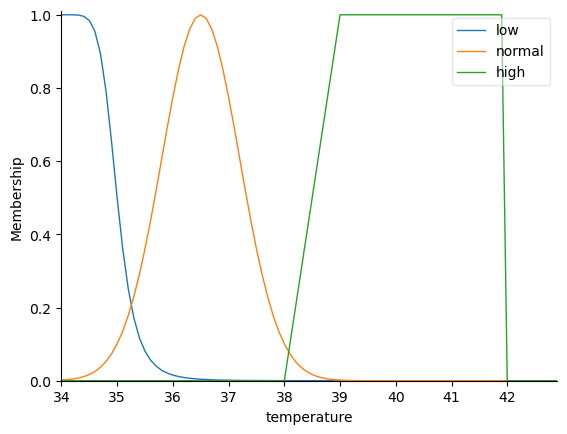

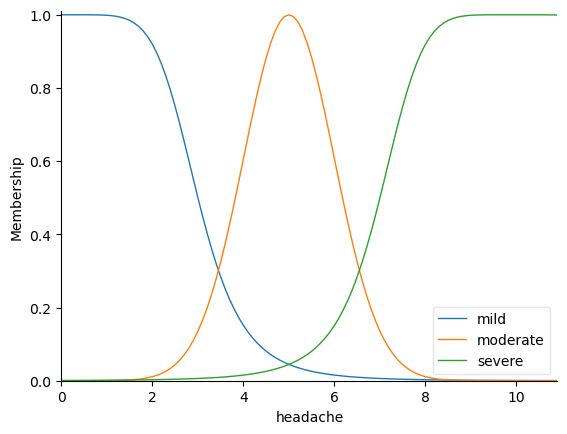

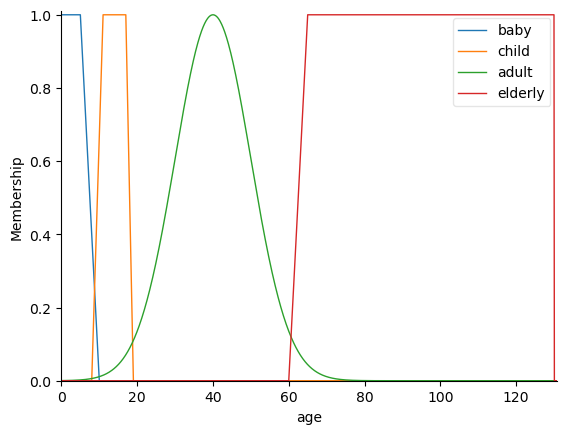

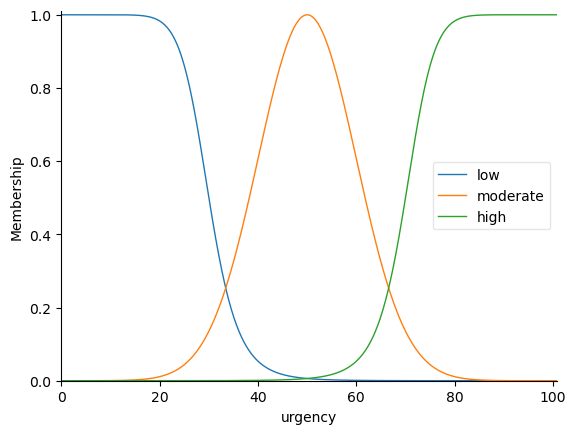

In [55]:
import matplotlib.pyplot as plt

# Visualize the Membership Functions
temperature.view()
headache.view()
age.view()
urgency.view()

plt.show()


In [127]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider

# [Your existing code to define the FIS]

# Generate a grid of values for temperature and headache
temp_values = np.arange(34, 43, 0.5)
headache_values = np.arange(0, 11, 0.5)
temp, headache = np.meshgrid(temp_values, headache_values)

# Function to compute urgency based on temperature, headache, and age
def compute_urgency(age_value):
    # Array to hold the results
    urgency_output = np.zeros_like(temp)

    # Loop through the grid and compute urgency
    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            urgency_simulation.input['temperature'] = temp[i, j]
            urgency_simulation.input['headache'] = headache[i, j]
            urgency_simulation.input['age'] = age_value
            urgency_simulation.compute()
            urgency_output[i, j] = urgency_simulation.output['urgency']
    
    return urgency_output

def update_plot(age_value):
    # Compute the urgency
    urgency_output = compute_urgency(age_value)

    # Create the plot
    fig = go.Figure(data=[go.Surface(z=urgency_output, x=temp, y=headache)])

    # Update plot layout
    fig.update_layout(
        title=f'Fuzzy Control Surface for Age = {age_value}',
        scene=dict(
            xaxis_title='Temperature',
            yaxis_title='Headache',
            zaxis_title='Urgency'
        ),
        autosize=False,
        width=700, height=700,
        margin=dict(l=65, r=50, b=65, t=90)
    )

    fig.show()

# Interactive plot
interact(update_plot, age_value=IntSlider(min=0, max=130, step=1, value=40))



interactive(children=(IntSlider(value=40, description='age_value', max=130), Output()), _dom_classes=('widget-…

<function __main__.update_plot(age_value)>

In [123]:
# Import necessary libraries
import numpy as np
from juzzyPython.generic.Tuple import Tuple
# from juzzyPython.intervalType2.sets.IntervalType2MF import IntervalType2MF
# from juzzyPython.intervalType2.system.T2_FLS_Mamdani import T2_FLS_Mamdani
from juzzyPython.intervalType2.sets.IntervalType2MF_Gaussian import IntervalType2MF_Gaussian
from juzzyPython.intervalType2.sets.IntervalType2MF_GaussianUMF import IntervalType2MF_GaussianUMF
from juzzyPython.intervalType2.sets.IntervalType2MF_GaussianLMF import IntervalType2MF_GaussianLMF
from juzzyPython.intervalType2.system.T2_FLS_Mamdani_Simulation import T2_FLS_Mamdani_Simulation

# Define the universe of discourse for each variable using numpy arrays
temperature_range = np.arange(34, 43, 0.1)
headache_range = np.arange(0, 11, 0.1)
age_range = np.arange(0, 131, 0.1)
urgency_range = np.arange(0, 101, 0.1)

# Define Type-2 Membership Functions for Temperature
temperature_low_UMF = IntervalType2MF_GaussianUMF('Temperature Low UMF', 34, 34, temperature_range)
temperature_low_LMF = IntervalType2MF_GaussianLMF('Temperature Low LMF', 34, 2, temperature_range)
temperature_low = IntervalType2MF_Gaussian('Temperature Low', temperature_low_UMF, temperature_low_LMF)

temperature_normal_UMF = IntervalType2MF_GaussianUMF('Temperature Normal UMF', 36.5, 0.7, temperature_range)
temperature_normal_LMF = IntervalType2MF_GaussianLMF('Temperature Normal LMF', 36.5, 1.4, temperature_range)
temperature_normal = IntervalType2MF_Gaussian('Temperature Normal', temperature_normal_UMF, temperature_normal_LMF)

temperature_high_UMF = IntervalType2MF_GaussianUMF('Temperature High UMF', 40, 1, temperature_range)
temperature_high_LMF = IntervalType2MF_GaussianLMF('Temperature High LMF', 40, 2, temperature_range)
temperature_high = IntervalType2MF_Gaussian('Temperature High', temperature_high_UMF, temperature_high_LMF)

# Define Type-2 Membership Functions for Headache
headache_mild_UMF = IntervalType2MF_GaussianUMF('Headache Mild UMF', 0, 3, headache_range)
headache_mild_LMF = IntervalType2MF_GaussianLMF('Headache Mild LMF', 0, 4, headache_range)
headache_mild = IntervalType2MF_Gaussian('Headache Mild', headache_mild_UMF, headache_mild_LMF)

headache_moderate_UMF = IntervalType2MF_GaussianUMF('Headache Moderate UMF', 5, 1, headache_range)
headache_moderate_LMF = IntervalType2MF_GaussianLMF('Headache Moderate LMF', 5, 2, headache_range)
headache_moderate = IntervalType2MF_Gaussian('Headache Moderate', headache_moderate_UMF, headache_moderate_LMF)

headache_severe_UMF = IntervalType2MF_GaussianUMF('Headache Severe UMF', 10, 1, headache_range)
headache_severe_LMF = IntervalType2MF_GaussianLMF('Headache Severe LMF', 10, 2, headache_range)
headache_severe = IntervalType2MF_Gaussian('Headache Severe', headache_severe_UMF, headache_severe_LMF)

# Define Type-2 Membership Functions for Age
age_baby_UMF = IntervalType2MF_GaussianUMF('Age Baby UMF', 5, 2, age_range)
age_baby_LMF = IntervalType2MF_GaussianLMF('Age Baby LMF', 5, 3, age_range)
age_baby = IntervalType2MF_Gaussian('Age Baby', age_baby_UMF, age_baby_LMF)

age_child_UMF = IntervalType2MF_GaussianUMF('Age Child UMF', 14, 3, age_range)
age_child_LMF = IntervalType2MF_GaussianLMF('Age Child LMF', 14, 4, age_range)
age_child = IntervalType2MF_Gaussian('Age Child', age_child_UMF, age_child_LMF)

age_adult_UMF = IntervalType2MF_GaussianUMF('Age Adult UMF', 40, 10, age_range)
age_adult_LMF = IntervalType2MF_GaussianLMF('Age Adult LMF', 40, 15, age_range)
age_adult = IntervalType2MF('Age Adult', age_adult_UMF, age_adult_LMF)

age_elderly_UMF = IntervalType2MF_GaussianUMF('Age Elderly UMF', 70, 10, age_range)
age_elderly_LMF = IntervalType2MF_GaussianLMF('Age Elderly LMF', 70, 15, age_range)
age_elderly = IntervalType2MF_Gaussian('Age Elderly', age_elderly_UMF, age_elderly_LMF)

# Define Type-2 Membership Functions for Urgency
urgency_low_UMF = IntervalType2MF_GaussianUMF('Urgency Low UMF', 0, 15, urgency_range)
urgency_low_LMF = IntervalType2MF_GaussianLMF('Urgency Low LMF', 0, 20, urgency_range)
urgency_low = IntervalType2MF_Gaussian('Urgency Low', urgency_low_UMF, urgency_low_LMF)

urgency_moderate_UMF = IntervalType2MF_GaussianUMF('Urgency Moderate UMF', 50, 10, urgency_range)
urgency_moderate_LMF = IntervalType2MF_GaussianLMF('Urgency Moderate LMF', 50, 15, urgency_range)
urgency_moderate = IntervalType2MF_Gaussian('Urgency Moderate', urgency_moderate_UMF, urgency_moderate_LMF)

urgency_high_UMF = IntervalType2MF_GaussianUMF('Urgency High UMF', 80, 10, urgency_range)
urgency_high_LMF = IntervalType2MF_GaussianLMF('Urgency High LMF', 80, 15, urgency_range)
urgency_high = IntervalType2MF_Gaussian('Urgency High', urgency_high_UMF, urgency_high_LMF)

# Initialize the Type-2 FLS Mamdani System
system = T2_FLS_Mamdani()

# Add variables to the system
system.addInputVariable(temperature_low)
system.addInputVariable(temperature_normal)
system.addInputVariable(temperature_high)
system.addInputVariable(headache_mild)
system.addInputVariable(headache_moderate)
system.addInputVariable(headache_severe)
system.addInputVariable(age_baby)
system.addInputVariable(age_child)
system.addInputVariable(age_adult)
system.addInputVariable(age_elderly)
system.addOutputVariable(urgency_low)
system.addOutputVariable(urgency_moderate)
system.addOutputVariable(urgency_high)

# Define rules using Type-2 sets (Example rules)
system.addRule([temperature_high, headache_severe], [urgency_high])
# Add similar rules for other combinations...

# Create a simulation for the control system
simulation = T2_FLS_Mamdani_Simulation(system)

# Set input values (example values)
simulation.setInputValue(temperature_low, Tuple(34, 34))
simulation.setInputValue(headache_mild, Tuple(10, 10))
simulation.setInputValue(age_baby, Tuple(12, 12))

# Compute the output
simulation.compute()

# Get the output value
output = simulation.getOutputValue(urgency_high)
print("Urgency:", output)


ModuleNotFoundError: No module named 'juzzyPython.intervalType2.sets.IntervalType2MF_Gaussian'

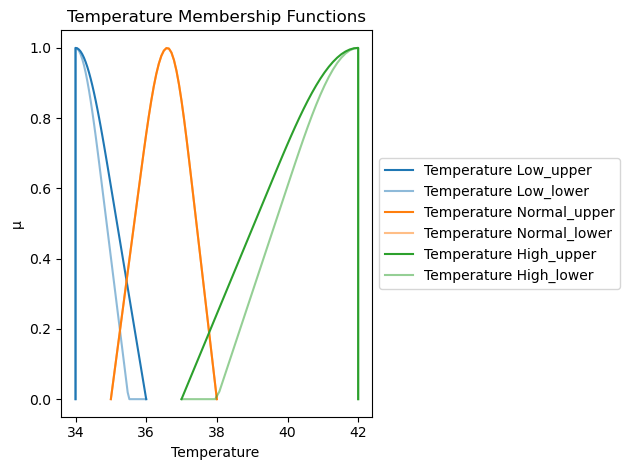

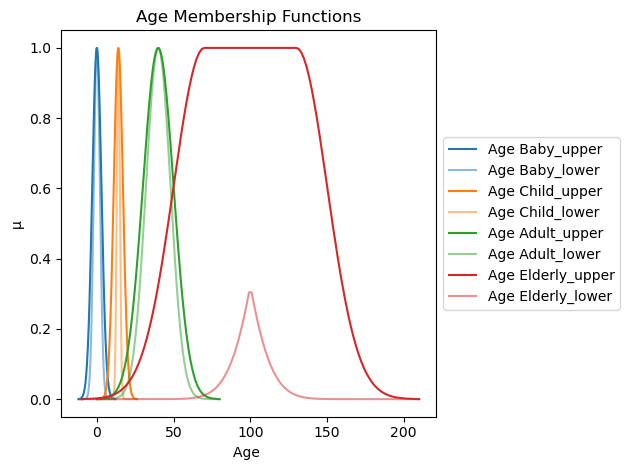

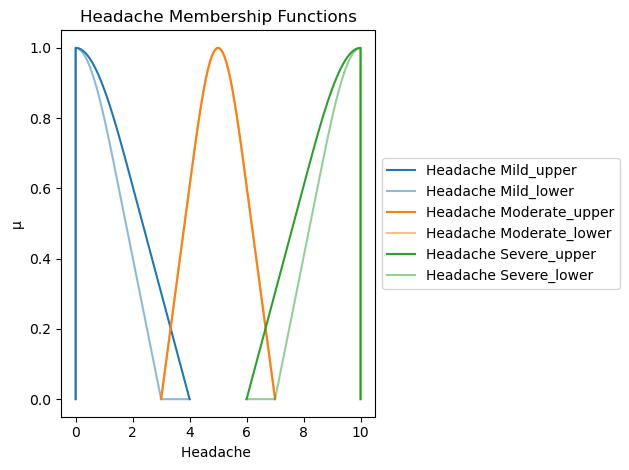

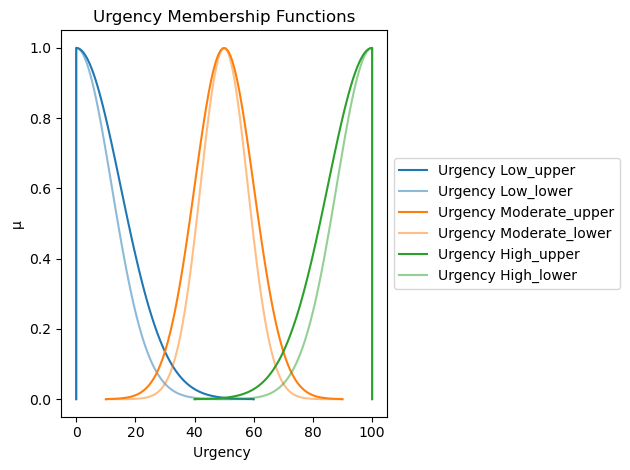

Urgency: None
Interval Type-2 Fuzzy Logic System with 9 rules:
IF low AND mild THEN moderate 
IF low AND moderate THEN high 
IF low AND severe THEN high 
IF nornal AND mild THEN low 
IF nornal AND moderate THEN low 
IF nornal AND severe THEN high 
IF high AND mild THEN moderate 
IF high AND moderate THEN high 
IF high AND severe THEN high 

OrderedDict([(<juzzyPython.generic.Output.Output object at 0x7fcd115a5cd0>, 0.0)])
None
None


In [126]:
# Import necessary libraries
import numpy as np
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Plot import Plot
from juzzyPython.intervalType2.sets.IntervalT2MF_Gaussian import IntervalT2MF_Gaussian
from juzzyPython.type1.sets.T1MF_Gaussian import T1MF_Gaussian
from juzzyPython.type1.sets.T1MF_Gauangle import T1MF_Gauangle
from juzzyPython.intervalType2.sets.IntervalT2MF_Trapezoidal import IntervalT2MF_Trapezoidal
from juzzyPython.intervalType2.sets.IntervalT2MF_Gauangle import IntervalT2MF_Gauangle
from juzzyPython.intervalType2.system.IT2_Antecedent import IT2_Antecedent
from juzzyPython.intervalType2.system.IT2_Consequent import IT2_Consequent
from juzzyPython.intervalType2.system.IT2_Rule import IT2_Rule
from juzzyPython.intervalType2.system.IT2_Rulebase import IT2_Rulebase
from juzzyPython.generic.Input import Input
from juzzyPython.generic.Output import Output
from juzzyPython.type1.sets.T1MF_Trapezoidal import T1MF_Trapezoidal

plot = Plot()
# Define the universe of discourse for each variable
temperature_range = Tuple(25, 45)
headache_range = Tuple(0, 10)
age_range = Tuple(0, 130)
urgency_range = Tuple(0, 100)

# Change
headache_imf = IntervalT2MF_Gauangle("inputmf",
    T1MF_Gauangle("inputumf", 2, 3, 4),
    T1MF_Gauangle("inputlmf", 2, 3, 4))

temp_imf = IntervalT2MF_Trapezoidal("inputmf",
    T1MF_Trapezoidal("inputumf", [0, 0, 1, 1]),
    T1MF_Trapezoidal("inputumf", [0, 0, 1, 1]))

age_imf = IntervalT2MF_Trapezoidal("inputmf",
    T1MF_Trapezoidal("inputumf", [0, 0, 0, 0]),
    T1MF_Trapezoidal("inputlmf", [0, 0, 0, 0]))

# Define Input and Output objects
temperature_input = Input('Temperature', temperature_range, inputMF=temp_imf)
headache_input = Input('Headache', headache_range, inputMF=headache_imf)
age_input = Input('Age', age_range, inputMF=age_imf)
urgency_output = Output('Urgency', urgency_range)

# Define Type-2 Membership Functions for Temperature
temperature_low_UMF = T1MF_Gauangle('Temperature Low UMF', 34, 34, 36)
temperature_low_LMF = T1MF_Gauangle('Temperature Low LMF', 34, 34, 35.5)
temperature_low = IntervalT2MF_Gauangle('Temperature Low', temperature_low_UMF, temperature_low_LMF)

temperature_normal_UMF = T1MF_Gauangle('Temperature Normal UMF', 35, 36.6, 38)
temperature_normal_LMF = T1MF_Gauangle('Temperature Normal LMF', 35, 36.6, 38)
temperature_normal = IntervalT2MF_Gauangle('Temperature Normal', temperature_normal_UMF, temperature_normal_LMF)

temperature_high_UMF =  T1MF_Gauangle('Temperature High UMF', 37, 42, 42)
temperature_high_LMF =  T1MF_Gauangle('Temperature High LMF', 38, 42, 42)
temperature_high = IntervalT2MF_Gauangle('Temperature High', temperature_high_UMF, temperature_high_LMF)

# Define Type-2 Membership Functions for Headache
headache_mild_UMF = T1MF_Gauangle('Headache Mild UMF', 0, 0, 4)
headache_mild_LMF = T1MF_Gauangle('Headache Mild LMF', 0, 0, 3)
headache_mild = IntervalT2MF_Gauangle('Headache Mild', headache_mild_UMF, headache_mild_LMF)

headache_moderate_UMF = T1MF_Gauangle('Headache Moderate UMF', 3, 5, 7)
headache_moderate_LMF = T1MF_Gauangle('Headache Moderate LMF', 3, 5, 7)
headache_moderate = IntervalT2MF_Gauangle('Headache Moderate', headache_moderate_UMF, headache_moderate_LMF)

headache_severe_UMF = T1MF_Gauangle('Headache Severe UMF', 6, 10, 10)
headache_severe_LMF = T1MF_Gauangle('Headache Severe LMF', 7, 10, 10)
headache_severe = IntervalT2MF_Gauangle('Headache Severe', headache_severe_UMF, headache_severe_LMF)

# Define Type-2 Membership Functions for Age
age_baby_UMF = T1MF_Gaussian('Age Baby UMF', 0, 3)
age_baby_LMF = T1MF_Gaussian('Age Baby LMF', 0, 2)
age_baby = IntervalT2MF_Gaussian('Age Baby', age_baby_UMF, age_baby_LMF)

age_child_UMF = T1MF_Gaussian('Age Child UMF', 14, 3)
age_child_LMF = T1MF_Gaussian('Age Child LMF', 14, 1)
age_child = IntervalT2MF_Gaussian('Age Child', age_child_UMF, age_child_LMF)

age_adult_UMF = T1MF_Gaussian('Age Adult UMF', 40, 10)
age_adult_LMF = T1MF_Gaussian('Age Adult LMF', 40, 8)
age_adult = IntervalT2MF_Gaussian('Age Adult', age_adult_UMF, age_adult_LMF)

age_elderly_UMF = T1MF_Gaussian('Age Elderly UMF', 130, 20)
age_elderly_LMF = T1MF_Gaussian('Age Elderly LMF', 70, 20)
age_elderly = IntervalT2MF_Gaussian('Age Elderly', age_elderly_UMF, age_elderly_LMF)

# Define Type-2 Membership Functions for Urgency
urgency_low_UMF =T1MF_Gaussian('Urgency Low UMF', 0, 15)
urgency_low_LMF = T1MF_Gaussian('Urgency Low LMF', 0, 12)
urgency_low = IntervalT2MF_Gaussian('Urgency Low', urgency_low_UMF, urgency_low_LMF)

urgency_moderate_UMF = T1MF_Gaussian('Urgency Moderate UMF', 50, 10)
urgency_moderate_LMF = T1MF_Gaussian('Urgency Moderate LMF', 50, 8)
urgency_moderate = IntervalT2MF_Gaussian('Urgency Moderate', urgency_moderate_UMF, urgency_moderate_LMF)

urgency_high_UMF = T1MF_Gaussian('Urgency High UMF', 100, 15)
urgency_high_LMF = T1MF_Gaussian('Urgency High LMF', 100, 12)
urgency_high = IntervalT2MF_Gaussian('Urgency High', urgency_high_UMF, urgency_high_LMF)


# Create Antecedents for temperature, headache, and age
temperature_low_antecedent = IT2_Antecedent(temperature_low, temperature_input, 'low')
temperature_normal_antecedent = IT2_Antecedent(temperature_normal, temperature_input, 'nornal')
temperature_high_antecedent = IT2_Antecedent(temperature_high, temperature_input, 'high')

# Create similar antecedents for other temperature ranges, headache, and age
headache_mild_antecedent = IT2_Antecedent(headache_mild, headache_input, 'mild')
headache_moderate_antecedent = IT2_Antecedent(headache_moderate, headache_input, 'moderate')
headache_severe_antecedent = IT2_Antecedent(headache_severe, headache_input, 'severe')

age_baby_antecedent = IT2_Antecedent(age_baby, age_input, 'baby')
age_child_antecedent = IT2_Antecedent(age_child, age_input, 'child')
age_adult_antecedent = IT2_Antecedent(age_adult, age_input, 'adult')
age_elderly_antecedent = IT2_Antecedent(age_elderly, age_input, 'elderly')

# Create Consequents for urgency
urgency_low_consequent = IT2_Consequent(urgency_low, urgency_output, 'low')  
urgency_moderate_consequent = IT2_Consequent(urgency_moderate, urgency_output, 'moderate')
urgency_high_consequent = IT2_Consequent(urgency_high, urgency_output, 'high')

# Define rules
rule1g = IT2_Rule([temperature_low_antecedent, headache_mild_antecedent], consequent=urgency_moderate_consequent)
rule2g = IT2_Rule([temperature_low_antecedent, headache_moderate_antecedent], consequent=urgency_high_consequent)
rule3g = IT2_Rule([temperature_low_antecedent, headache_severe_antecedent], consequent=urgency_high_consequent)
rule4g = IT2_Rule([temperature_normal_antecedent, headache_mild_antecedent], consequent=urgency_low_consequent)
rule5g = IT2_Rule([temperature_normal_antecedent, headache_moderate_antecedent], consequent=urgency_low_consequent)
rule6g = IT2_Rule([temperature_normal_antecedent, headache_severe_antecedent], consequent=urgency_high_consequent)
rule7g = IT2_Rule([temperature_high_antecedent, headache_mild_antecedent], consequent=urgency_moderate_consequent)
rule8g = IT2_Rule([temperature_high_antecedent, headache_moderate_antecedent], consequent=urgency_high_consequent)
rule9g = IT2_Rule([temperature_high_antecedent, headache_severe_antecedent], consequent=urgency_high_consequent)

# rule2 = IT2_Rule([temperature_high_antecedent, headache_mild_antecedent, age_elderly_antecedent], consequent=urgency_moderate_consequent)
# rule3 = IT2_Rule([temperature_low_antecedent, age_child_antecedent], consequent=urgency_high_consequent)
# rule4 = IT2_Rule([headache_moderate_antecedent, age_adult_antecedent], consequent=urgency_low_consequent)
# rule5 = IT2_Rule([headache_severe_antecedent, age_child_antecedent], consequent=urgency_moderate_consequent)
# rule6 = IT2_Rule([temperature_normal_antecedent, headache_mild_antecedent, age_adult_antecedent], consequent=urgency_low_consequent)
# rule7 = IT2_Rule([age_elderly_antecedent, headache_moderate_antecedent], consequent=urgency_moderate_consequent)
# rule8 = IT2_Rule([temperature_high_antecedent, age_child_antecedent], consequent=urgency_high_consequent)
# rule9 = IT2_Rule([headache_severe_antecedent, age_adult_antecedent], consequent=urgency_high_consequent)
# rule10 = IT2_Rule([temperature_normal_antecedent, headache_moderate_antecedent, age_elderly_antecedent], consequent=urgency_moderate_consequent)


# Create a rulebase and add rules
rulebase = IT2_Rulebase()
# Add rules to the rulebase
rulebase.addRule(rule1g)
rulebase.addRule(rule2g)
rulebase.addRule(rule3g)
rulebase.addRule(rule4g)
rulebase.addRule(rule5g)
rulebase.addRule(rule6g)
rulebase.addRule(rule7g)
rulebase.addRule(rule8g)
rulebase.addRule(rule9g)

# rulebase.addRule(rule2)
# rulebase.addRule(rule3)
# rulebase.addRule(rule4)
# rulebase.addRule(rule5)
# rulebase.addRule(rule6)
# rulebase.addRule(rule7)
# rulebase.addRule(rule8)
# rulebase.addRule(rule9)
# rulebase.addRule(rule10)


def plotMFs(name, sets, discretizationLevel):
    """
    Plot the membership functions (MFs) for a given set of fuzzy sets.

    Parameters:
    name (str): Title of the plot.
    sets (list): List of fuzzy sets to be plotted.
    xAxisRange (tuple): The range of x-axis values.
    discretizationLevel (int): The number of points to discretize the MFs.
    """
    # Validate inputs
    if not sets or discretizationLevel <= 0:
        raise ValueError("Invalid sets or discretizationLevel")

    # Plotting
    plot.figure()
    plot.title(name)

    for i in range(len(sets)):
        plot.plotMF2(name.replace("Membership Functions",""),sets[i].getName(),sets[i],discretizationLevel,True)
    
    plot.legend()
    plot.show()
    
def getControlSurfaceData(useCentroidDefuzz,input1Discs,input2Discs,unit = False) -> None:
        """Get the data to plot the control surface"""
        if unit:
            test = []
        incrX = food.getDomain().getSize()/(input1Discs-1.0)
        incrY = service.getDomain().getSize()/(input2Discs-1.0)
        x = []
        y = []
        z = [ [0]*input1Discs for i in range(input2Discs)]

        for i in range(input1Discs):
            x.append(i*incrX)
        for i in range(input2Discs):
            y.append(i*incrY)
        
        for x_ in range(input1Discs):
            self.food.setInput(x[x_])
            for y_ in range(input2Discs):
                self.service.setInput(y[y_])
                if useCentroidDefuzz:
                    out = self.rulebase.evaluate(1).get(self.tip)
                else:
                    out = self.rulebase.evaluate(0).get(self.tip)
                if out == None or math.isnan(out):
                    z[y_][x_] = 0.0
                    if unit:
                        test.append(0.0)
                else:
                    z[y_][x_] = out
                    if unit:
                        test.append(out)
        if unit:
            return test
        self.plot.plotControlSurface(x,y,z,self.food.getName(),self.service.getName(),self.tip.getName())
        
        

def get(age_, headache_, temp_):
    age_input.setInput(age_)
    headache_input.setInput(headache_)
    temperature_input.setInput(temp_)
    u = rulebase.evaluate(0).get(urgency)
    print(rulebase.toString())
    print(rulebase.evaluate(0))
    return u

def get1(age_l, age_u, headache_l, headache_u, temp_l, temp_u):
    if age_l == age_u:
        (age_l, age_u) = (age_l - 0.5, age_l + 0.5)

    age_input.setInputMF(T1MF_Trapezoidal("inputmf", [age_l, age_l, age_u, age_u]))
    headache_input.setInputMF(T1MF_Gauangle("inputmf", headache_l, (headache_l + headache_u) / 2, headache_u))
    temperature_input.setInputMF(T1MF_Trapezoidal("inputmf", [temp_l, temp_l, temp_u, temp_u]))

    #(peak, peak_x) = reduction_lom(rulebase)
    u = rulebase.evaluate(0).get(urgency)
    return u

def output_interval(age_lower, age_upper, headache_lower, headache_upper, temp_lower, temp_upper):
    # Validate input parameters
    if any(param < 0 for param in [age_lower, age_upper, headache_lower, headache_upper, temp_lower, temp_upper]):
        raise ValueError("Input parameters cannot be negative")
    
    # Handle single-value interval for age
    # if age_lower == age_upper:
    #     age_expansion = max(0.5, 0.1 * (age_upper - age_lower))  # Example dynamic expansion
    #     age_lower, age_upper = age_lower - age_expansion, age_upper + age_expansion
    # print(age_lower, age_upper)
    # Set membership functions
    age_input.setInputMF(T1MF_Trapezoidal("AgeMF", [age_lower, age_lower, age_upper, age_upper]))
    headache_input.setInputMF(T1MF_Gauangle("HeadacheMF", headache_lower, (headache_lower + headache_upper) / 2, headache_upper))
    temperature_input.setInputMF(T1MF_Trapezoidal("TempMF", [temp_lower, temp_lower, temp_upper, temp_upper]))

    # Evaluate the rulebase
    try:
        urgency_value = rulebase.evaluate(0).get(urgency)
    except Exception as e:
        raise RuntimeError(f"Error in rulebase evaluation: {e}")

    # Return urgency and its defuzzified value
    return urgency_value  # defuzz(urgency_value)


plotMFs("Temperature Membership Functions", [temperature_low, temperature_normal, temperature_high], 43)
plotMFs("Age Membership Functions", [age_baby, age_child, age_adult, age_elderly], 130)
plotMFs("Headache Membership Functions", [headache_mild, headache_moderate, headache_severe], 100)
plotMFs("Urgency Membership Functions", [urgency_low, urgency_moderate, urgency_high], 100)

urgency = output_interval(30, 30, 2, 4, 36, 40)

print(f"Urgency: {urgency}")
print(get(30, 2, 36))
print(get1(30, 30, 2, 4, 36, 40))